# NASA Data Collection and Analysis

Este caderno Jupyter é destinado à coleta e análise de dados da NASA, incluindo asteroides, a Imagem do Dia (APOD) e fotos do Rover Curiosity. O código está estruturado em classes para facilitar a manutenção e a leitura. Nao se esquecam de ler o readme no github!

Nos últimos anos, o avanço tecnológico e o financiamento da NASA têm sido cruciais para descobertas científicas que moldam nosso entendimento do universo. Desde 2005, testemunhamos um aumento significativo na capacidade de explorar e documentar fenômenos astronômicos, como a descoberta de meteoros, imagens impressionantes de planetas e galáxias, e a exploração do nosso sistema solar. Esses progressos não apenas ampliam nosso conhecimento, mas também tem o potencial de garantir um futuro prospero para a humanidade.

O código apresentado neste notebook foi desenvolvido para coletar dados da NASA, permitindo a análise de asteroides, a visualização de imagens do dia (APOD) e a contagem de fotos tiradas pelo Mars Rover, comparando os avancos presentes entre os anos 2005 e 2024. Através de tecnologias como APIs da NASA, pandas para manipulação de dados e visualização gráfica com matplotlib e seaborn, conseguimos ilustrar as mudanças nas descobertas e na exploração espacial. Os resultados demonstram a evolução das informações desde 2005 até os dias atuais, destacando a importância do investimento contínuo em pesquisa espacial. À medida que avançamos, fica claro que, se continuarmos a focar nesse tema, as descobertas científicas essenciais para a humanidade apenas tendem a crescer.

 O objetivo deste codigo é comparar a qualidade e a quantidade de dados coletados durante um período de sete dias em 2005 e em 2024. Essa análise permitirá descrever de forma precisa as mudanças e os avanços significativos que a exploração espacial experimentou nas últimas duas décadas. Vamos examinar os dados quantitativos, como o volume de informações obtidas, por meio de planilhas e gráficos. Além disso, avaliaremos os dados qualitativos, como a qualidade das imagens, obtendo os links das fotos para uma análise mais aprofundada.

In [24]:
# Importando bibliotecas necessárias
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Any
from api import chave_api


## Classe NASAColetorDados

Esta classe é responsável por buscar dados da NASA, como asteroides, APOD e fotos do Mars Rover.


In [25]:
class NASAColetorDados:
    """Classe para buscar dados da NASA, como asteroides, APOD e fotos do Mars Rover."""
    
    def __init__(self, chave_api: str = chave_api):
        # Inicializa a classe com a chave da API da NASA
        self.chave_api = chave_api

    def buscar_dados_asteroides(self, data_inicio: str, data_fim: str) -> List[Dict[str, Any]]:
        """Busca dados de asteroides em um intervalo de datas."""
        url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={data_inicio}&end_date={data_fim}&api_key={self.chave_api}'
        resposta = requests.get(url)
        if resposta.status_code == 200:
            # Se a resposta for bem-sucedida, processa os dados
            dados = resposta.json()
            lista_asteroides = [
                {
                    'Nome': ast['name'], 
                    'ID': ast['id'], 
                    'Data Aproximação': data,
                    'Diâmetro Mínimo (km)': ast['estimated_diameter']['kilometers']['estimated_diameter_min'],
                    'Diâmetro Máximo (km)': ast['estimated_diameter']['kilometers']['estimated_diameter_max'],
                    'Velocidade Relativa (km/s)': ast['close_approach_data'][0]['relative_velocity']['kilometers_per_second'],
                    'Distância Passagem (km)': ast['close_approach_data'][0]['miss_distance']['kilometers'],
                    'Perigoso': ast['is_potentially_hazardous_asteroid'],
                    'Data Observação': ast.get('orbital_data', {}).get('first_observation_date', 'N/A')
                } for data, asteroides in dados['near_earth_objects'].items() for ast in asteroides
            ]
            return lista_asteroides
        print(f"Erro: {resposta.status_code}")  # Exibe erro caso a busca não tenha sucesso
        return []

    def buscar_imagem_dia(self, data_inicio: str, data_fim: str) -> List[Dict[str, Any]]:
        """Busca a imagem do dia da NASA (APOD) em um intervalo de datas."""
        url = 'https://api.nasa.gov/planetary/apod'
        params = {'start_date': data_inicio, 'end_date': data_fim, 'api_key': self.chave_api}
        resposta = requests.get(url, params=params)
        if resposta.status_code == 200:
            return resposta.json()  # Retorna os dados APOD se a resposta for bem-sucedida
        print(f"Erro: {resposta.status_code}")
        return []

    def contar_fotos_mars_rover(self, ano: int, mes: str, dia: str) -> int:
        """Conta quantas fotos o Rover Curiosity tirou em uma data específica."""
        url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?earth_date={ano}-{mes}-{dia}&api_key={self.chave_api}"
        resposta = requests.get(url)
        if resposta.status_code == 200:
            dados = resposta.json()
            fotos = dados.get('photos', [])  # Obtém a lista de fotos
            return len(fotos)  # Retorna a quantidade de fotos
        print(f"Erro: {resposta.status_code}")
        return 0

## Classe AnalisadorDados

Esta classe é responsável por analisar e visualizar os dados coletados.


In [26]:
class AnalisadorDados:
    """Classe para analisar e visualizar dados de asteroides, APOD e fotos do Mars Rover."""
    
    def __init__(self, coletor: NASAColetorDados, dados_asteroides_2005: pd.DataFrame, dados_asteroides_2024: pd.DataFrame, apod_data: List[List[Dict[str, Any]]]):
        # Recebe os dados coletados e os armazena para análise
        self.coletor = coletor
        self.dados_asteroides = pd.concat([dados_asteroides_2005.assign(Ano=2005), dados_asteroides_2024.assign(Ano=2024)])
        self.apod_data = apod_data

    def exibir_imagemdia_detalhes(self) -> None:
        """Exibe detalhes das entradas do APOD, como título e explicação."""
        intervalos = ['2024-09-01 a 2024-09-07', '2005-09-01 a 2005-09-07']
        for i, apod in enumerate(self.apod_data):
            print(f"APOD de {intervalos[i]}:")
            for item in apod:
                print(f"Título: {item['title']}")
                print(f"Data: {item['date']}")
                print(f"URL: {item['url']}")
                print(f"Explicação: {item['explanation']}\n")

    def plotar_dados_asteroides(self) -> None:
        """Plota gráficos sobre asteroides e se são perigosos ou não."""
        plt.figure(figsize=(12, 5))

        # Gráfico do número total de asteroides
        plt.subplot(1, 2, 1)
        contagem_asteroides = self.dados_asteroides.groupby('Ano')['ID'].count().reset_index()
        sns.barplot(x='Ano', y='ID', data=contagem_asteroides)
        plt.title('Número de Asteroides Detectados')

        # Gráfico de asteroides potencialmente perigosos
        plt.subplot(1, 2, 2)
        perigosos = self.dados_asteroides.groupby(['Ano', 'Perigoso'])['ID'].count().unstack().reset_index()
        perigosos.plot(kind='bar', stacked=True, x='Ano', ax=plt.gca())
        plt.title('Asteroides Potencialmente Perigosos')
        plt.show()

    def plotar_apod(self) -> None:
        """Plota a quantidade de entradas do APOD por intervalo de datas."""
        intervalos = ['2024-09-01 a 2024-09-07', '2005-09-01 a 2005-09-07']
        contagem_apod = [len(apod) for apod in self.apod_data]
        plt.bar(intervalos, contagem_apod, color=['blue', 'orange'])
        plt.xlabel('Intervalos de Data')
        plt.ylabel('Número de Entradas APOD')
        plt.title('Comparação de Entradas APOD')
        plt.show()

    def plotar_fotos_mars_rover(self, dia: str, mes: str) -> None:
        """Plota quantas fotos o Rover Curiosity tirou em datas específicas."""
        contagem_fotos = [self.coletor.contar_fotos_mars_rover(ano, mes, dia) for ano in [2015, 2023]]
        anos = ['2015', '2023']
        plt.bar(anos, contagem_fotos, color=['blue', 'orange'])
        plt.xlabel('Ano')
        plt.ylabel('Número de Fotos')
        plt.title(f'Fotos tiradas pelo Curiosity em {dia}/{mes} em 2015 e 2023')
        plt.show()

## Função Principal

Esta função principal executa a busca e análise de dados da NASA.

APOD de 2024-09-01 a 2024-09-07:
Título: The Moon Dressed Like Saturn
Data: 2024-09-01
URL: https://apod.nasa.gov/apod/image/2409/SaturnMoon_Sojuel_960.jpg
Explicação: Why does Saturn appear so big? It doesn't -- what is pictured are foreground clouds on Earth crossing in front of the Moon. The Moon shows a slight crescent phase with most of its surface visible by reflected Earthlight, known as Da Vinci glow. The Sun directly illuminates the brightly lit lunar crescent from the bottom, which means that the Sun must be below the horizon and so the image was taken before sunrise.  This double take-inducing picture was captured on 2019 December 24, two days before the Moon slid in front of the Sun to create a solar eclipse. In the foreground, lights from small Guatemalan towns are visible behind the huge volcano Pacaya.    Your Sky Surprise: What picture did APOD feature on your birthday? (post 1995)

Título: A Triangular Prominence Hovers Over the Sun
Data: 2024-09-02
URL: https://apod.n

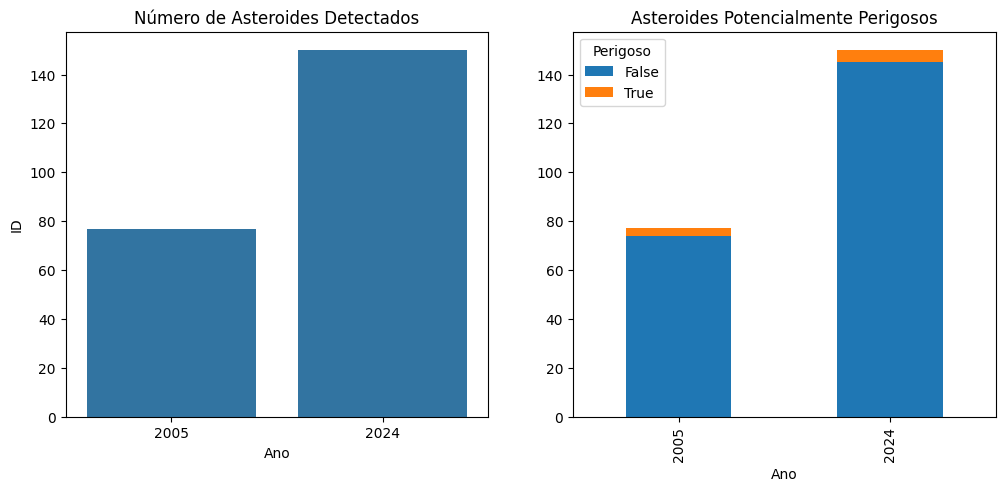

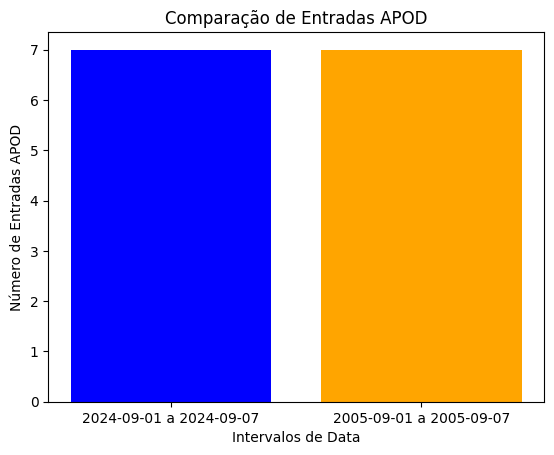

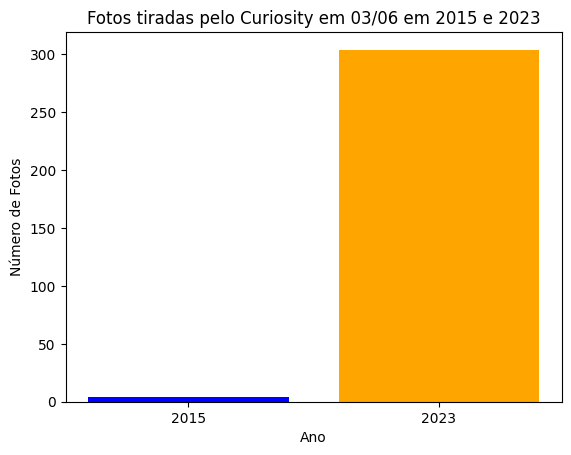

In [27]:
def main() -> None:
    """Função principal que executa a busca e análise de dados da NASA."""
    CHAVE_API = chave_api
    coletor = NASAColetorDados(chave_api=CHAVE_API)
    
    # Define os intervalos de datas para busca
    intervalos_datas = [('2024-09-01', '2024-09-07'), ('2005-09-01', '2005-09-07')]

    # Busca os dados de asteroides para os anos especificados
    dados_asteroides_2024 = pd.DataFrame(coletor.buscar_dados_asteroides(*intervalos_datas[0]))
    dados_asteroides_2005 = pd.DataFrame(coletor.buscar_dados_asteroides(*intervalos_datas[1]))
    
    # Busca os dados APOD
    apod_data = [coletor.buscar_imagem_dia(*intervalo) for intervalo in intervalos_datas]
    
    # Cria um analisador de dados
    analisador = AnalisadorDados(coletor, dados_asteroides_2005, dados_asteroides_2024, apod_data)
    analisador.exibir_imagemdia_detalhes()  # Exibe detalhes do APOD
    analisador.plotar_dados_asteroides()  # Plota dados de asteroides
    analisador.plotar_apod()  # Plota dados do APOD
    
    # Plota fotos do Mars Rover
    analisador.plotar_fotos_mars_rover("03", "06")  # Plota fotos tiradas em 3 de junho


# Executando a função principal
main()

### Analise

### Detecao de meteoros
O código coleta dados sobre a detecção de meteoros próximos à Terra, organizando-os em tabelas para dois anos. Os resultados são apresentados em um gráfico que destaca os meteoros perigosos. Essa análise mostra um aumento de 70% nas detecções de meteoros nos últimos anos, como demonstrado nos gráficos gerados pelo codigo.

Os gráficos evidenciam o avanço da tecnologia de observação espacial nas últimas décadas, impulsionado por inovações rápidas e investimentos significativos. É importante notar que foram detectados meteoros potencialmente perigosos em ambos os anos, ressaltando a necessidade de monitorar esses eventos e como nossa capacidade de prevenção tem melhorado.

### Analise Mars Rover Curiosity

Utilizamos a API para obter fotos tiradas pelo Mars Rover Curiosity em Marte, com dados disponíveis de 2015 a 2023, focando em um único dia. O gráfico revela uma disparidade significativa no número de fotos registradas: em 2023, foram cerca de 300 fotos, enquanto em 2015, apenas 20. Essa diferença pode ser atribuída a vários fatores, como falhas na máquina ou falta de financiamento. No entanto, o mais provável é que seja resultado das melhorias tecnológicas atuais, que permitem capturar e armazenar muito mais imagens do que os modelos de rover de 2015.

### Fotos diarias

Por ultimo, similarmente, utilizamos a API para obter diversaas "fotos do dia" da nasa, que sao fotos novas retiradas pela insistuicao todo dia. O codigo obtem o link dessas fotos junto com uma breve descricao de cada e desta vez buscamos annalisar a diferenca de qualidade delas, entre as fotos de 2005 e 2024.

2024:
https://apod.nasa.gov/apod/image/2409/Bat_Taivalnaa_960.jpg

2005:
https://apod.nasa.gov/apod/image/0509/47tuc_salt.jpg

Podemos observar uma diferença significativa na qualidade das fotos, com a imagem de 2024 apresentando uma resolução muito superior em comparação à de 2005. Além disso, o gráfico anterior sobre a quantidade de fotos capturadas pelo Mars Rover reforça a importância dessa evolução. A capacidade de tirar mais fotos, com maior qualidade, nos proporciona informações mais detalhadas sobre regiões cada vez mais distantes do universo. A foto de 2024, por exemplo, foi capturada a mais de 70 mil anos-luz de distância, ilustrando como essas melhorias tecnológicas podem levar a descobertas que têm o potencial de transformar o futuro da humanidade.

### Conclusão

Concluindo, essas fotos, juntamente com os gráficos de detecção de meteoros, evidenciam a rápida evolução tecnológica e seu impacto direto em nossas descobertas científicas. Comparado a 2005, houve um aumento de 70% nas detecções de meteoros, o que aprimora nossa capacidade de evitar catástrofes. Além disso, observamos um aumento expressivo na quantidade e qualidade das fotos capturadas pelos rovers em Marte, o que nos permite realizar descobertas ainda mais inovadoras e relevantes para o futuro da humanidade.